## Day34 - ERRORS AND ONLY ERRORS

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

import pandas as pd
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
ticker = 'AAPL'

# html requests + bs4
URL = 'https://finviz.com/quote.ashx?t=' + ticker
req = Request(url=URL,headers={'user-agent': 'my-app/0.0.1'}) 
resp = urlopen(req)    
html = BeautifulSoup(resp, features="lxml")

# get news-table
news_table = html.find(id='news-table')
# get list of all <tr> elements (aka rows)
table = news_table.findAll('tr')

titles = []

for row in table:
    titles.append(row.a.text.strip())
    
df = pd.DataFrame({'text' : titles})

In [3]:
analyser = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """
    :param text: headline of the current news
    :return sentiment: sentiment 
        sentiment = 0  : neutral
        sentiment = 1  : positive
        sentiment = -1 : negative
    """
    compound = analyser.polarity_scores(text)['compound']
    
    if compound >= 0.2:
        return 1
    elif compound <= -0.2:
        return -1
    return 0
    
df['sentiment'] = df.text.apply(lambda x : get_sentiment(x))

In [43]:
Counter(df['sentiment'])

Counter({0: 51, 1: 34, -1: 15})

Text(0.5, 1.0, 'BTC-USD Sentiment Analysis - finviz.com')

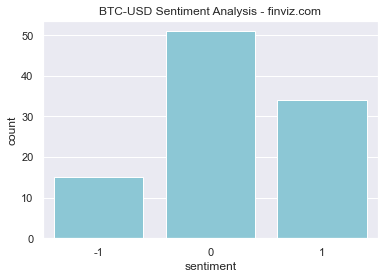

In [44]:
sns.countplot(x="sentiment", data=df, color="#80CEE1")
plt.title('BTC-USD Sentiment Analysis - finviz.com')

## Twitter scraper

In [30]:
import requests
import json
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter

params = {
    'q': 'tesla',
    'tweet_mode': 'extended',
    'lang': 'en',
    'until' : '2021-03-30T00:00:00Z'
}

response = requests.get(
    'https://api.twitter.com/1.1/search/tweets.json',
    params=params,
    headers={
        'authorization': 'Bearer '+ 'AAAAAAAAAAAAAAAAAAAAAB6QOAEAAAAAkzXUofRnDON0Iie%2BMLpwEHaXrzs%3DNMP3nSmjACFqI095375gaRhjNynv7BYNAUwmQfDb4ciGCJEz4M'
})

In [76]:
def get_data(tweet):
    data = {
        'id': tweet['id'],
        'created_at': tweet['created_at'],
        'text': tweet['text']
    }
    return data

In [96]:
whitespace = re.compile(r"\s+")
web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
tesla = re.compile(r"(?i)@Tesla(?=\b)")
user = re.compile(r"(?i)@[a-z0-9_]+")

def clean_text(text):
    
    tweet = whitespace.sub(' ', text)
    tweet = web_address.sub('', tweet)
    tweet = tesla.sub('Tesla', tweet)
    tweet = user.sub('', tweet)
    
    return text

df['text'] = df.text.apply(lambda x : clean_text(x))

In [97]:
analyser = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """
    :param text: headline of the current news
    :return sentiment: sentiment 
        sentiment = 0  : neutral
        sentiment = 1  : positive
        sentiment = -1 : negative
    """
    compound = analyser.polarity_scores(text)['compound']
    
    if compound >= 0.2:
        return 1
    elif compound <= -0.2:
        return -1
    return 0
    
df['sentiment'] = df.text.apply(lambda x : get_sentiment(x))

In [13]:
def get_data(tweet):
    data = {
        'created_at': tweet['created_at'],
        'text': tweet['text']
    }
    return data

In [18]:
# https://towardsdatascience.com/sentiment-analysis-for-stock-price-prediction-in-python-bed40c65d178

from datetime import datetime, timedelta
import requests
import pandas as pd

BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAB6QOAEAAAAAkzXUofRnDON0Iie%2BMLpwEHaXrzs%3DNMP3nSmjACFqI095375gaRhjNynv7BYNAUwmQfDb4ciGCJEz4M'

# setup the API request
endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(tesla OR tsla OR elon musk) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%SZ'  # the date format string required by twitter
    
now = datetime.now()  # get the current datetime, this is our starting point
last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API

df = pd.DataFrame()  # initialize dataframe to store tweets

params['start_time'] = "2021-03-30T18:18:00Z"
params['end_time'] = "2021-03-30T18:19:00Z"

print(params)

response = requests.get(endpoint,
                        params=params,
    headers={
        'authorization': 'Bearer '+ 'AAAAAAAAAAAAAAAAAAAAAB6QOAEAAAAAkzXUofRnDON0Iie%2BMLpwEHaXrzs%3DNMP3nSmjACFqI095375gaRhjNynv7BYNAUwmQfDb4ciGCJEz4M'})
        # send the request
# iteratively append our tweet data to our dataframe

for tweet in response.json()['data']:
    row = get_data(tweet)  # we defined this function earlier
    df = df.append(row, ignore_index=True)

{'query': '(tesla OR tsla OR elon musk) (lang:en)', 'max_results': '100', 'tweet.fields': 'created_at,lang', 'start_time': '2021-03-30T18:18:00Z', 'end_time': '2021-03-30T18:19:00Z'}


In [19]:
len(df)

100

In [64]:
from datetime import datetime, timedelta
import requests
import pandas as pd

# read bearer token for authentication
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAB6QOAEAAAAAkzXUofRnDON0Iie%2BMLpwEHaXrzs%3DNMP3nSmjACFqI095375gaRhjNynv7BYNAUwmQfDb4ciGCJEz4M'

# setup the API request
endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(tesla OR tsla OR elon musk) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%SZ'  # the date format string required by twitter

# we use this function to subtract 60 mins from our datetime string
def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)
    
now = datetime.now()  # get the current datetime, this is our starting point
last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API

df = pd.DataFrame()  # initialize dataframe to store tweets
while True:
    if datetime.strptime(now, dtformat) < last_week:
        # if we have reached 7 days ago, break the loop
        break
        
    pre60 = time_travel(now, 120)  # get 60 minutes before 'now'
    now = time_travel(now, 60)
    # assign from and to datetime parameters for the API
    params['start_time'] = pre60
    params['end_time'] = now
    
    print(params['start_time'])
    print(params['end_time'])
    response = requests.get(endpoint,
                            params=params,
                            headers=headers)  # send the request
    now = pre60  # move the window 60 minutes earlier
    
    print(response.json())
    
    # iteratively append our tweet data to our dataframe
    for tweet in response.json()['data']:
        row = get_data(tweet)  # we defined this function earlier
        df = df.append(row, ignore_index=True)

{'query': '(tesla OR tsla OR elon musk) (lang:en)', 'max_results': '100', 'tweet.fields': 'created_at,lang', 'start_time': '2021-03-30T18:18:00Z', 'end_time': '2021-03-30T19:18:00Z'}
2021-03-30T18:18:00Z
2021-03-30T19:18:00Z
{'errors': [{'parameters': {'start_time': ['2021-03-30T18:18Z']}, 'message': "Invalid 'start_time':'2021-03-30T18:18Z'. 'start_time' must be a minimum of 10 seconds prior to the request time."}], 'title': 'Invalid Request', 'detail': 'One or more parameters to your request was invalid.', 'type': 'https://api.twitter.com/2/problems/invalid-request'}


KeyError: 'data'

In [91]:
from datetime import datetime, timedelta
import requests
import pandas as pd

# read bearer token for authentication
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAB6QOAEAAAAAkzXUofRnDON0Iie%2BMLpwEHaXrzs%3DNMP3nSmjACFqI095375gaRhjNynv7BYNAUwmQfDb4ciGCJEz4M'

# setup the API request
endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(tesla OR tsla OR elon musk) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%SZ'  # the date format string required by twitter

# we use this function to subtract 60 mins from our datetime string
def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)
    
now = datetime.now()  # get the current datetime, this is our starting point
last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API

df = pd.DataFrame()  # initialize dataframe to store tweets
        
pre60 = time_travel(now, 10)  # get 60 minutes before 'now'ù
# assign from and to datetime parameters for the API
params['start_time'] = time_travel(now, 11)
params['end_time'] = time_travel(now, 10)

print(params['start_time'])
print(params['end_time'])
response = requests.get(endpoint,
                        params={'query': '(tesla OR tsla OR elon musk) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang', 'start_time' : str(time_travel(now, 11)), 'end_time' : str(time_travel(now, 10))},
                        headers=headers)  # send the request
now = pre60  # move the window 60 minutes earlier
print(response.json())

# iteratively append our tweet data to our dataframe
for tweet in response.json()['data']:
    row = get_data(tweet)  # we defined this function earlier
    df = df.append(row, ignore_index=True)

2021-03-30T20:28:25Z
2021-03-30T20:29:25Z
{'errors': [{'parameters': {'start_time': ['2021-03-30T20:28Z']}, 'message': "Invalid 'start_time':'2021-03-30T20:28Z'. 'start_time' must be a minimum of 10 seconds prior to the request time."}], 'title': 'Invalid Request', 'detail': 'One or more parameters to your request was invalid.', 'type': 'https://api.twitter.com/2/problems/invalid-request'}


KeyError: 'data'

In [1]:
import tweepy
import webbrowser
import time

In [2]:
consumer_key = 'jhZ7FspWc0to8qvTskZIMjacS'
consumer_secret_key = 'vbbmxiqLULPWGf4ge4wS3zLnQVFPIXhDzhfI5wZ9nfQTUb3cAB'
callback_uri = 'oob'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=w69_xQAAAAABOJAeAAABeISww6U


True

In [4]:
user_pint_input = input("What's the pin value?")

What's the pin value? 3205623


In [5]:
user_pint_input

'3205623'

In [6]:
auth.get_access_token(user_pint_input)

('853242107544449024-a9kURomUQzq4QxVc0VlSek7H3iG3itO',
 '2zFQrxeBtPOHmxaHbSaxxHRbhhggsIBygTXGieObkWqnL')

In [7]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [8]:
import pandas as pd

fetch_tweets=tweepy.Cursor(api.search, q="tesla",count=100, lang ="en",since="2021-03-30", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

KeyboardInterrupt: 

In [ ]:
data